In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import scipy as sp
from scipy import stats
import sklearn

from scipy.stats import norm
import matplotlib.mlab as mlab

#from statsmodels.stats.diagnostic import lilliefors
#import statsmodels.api as sm 
from scipy.stats import chisquare

import pingouin as pg

from sklearn.preprocessing import PowerTransformer
import scipy.stats

import statsmodels.stats.weightstats as wstats

import time

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
CSN_path = './Data/'

def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

CSN_new_err = CSN['Error'][-18:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments', 'Error'], axis=1)

tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)

CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

CSN_new_A = CSN_new[-18:] #assign the last 18 examples for 18 test cases for a different array

CSN_prepared_B = CSN_new[:-18] # Removing the last 18 
CSN_hold_1 = sklearn.utils.shuffle(CSN_prepared_B, random_state=5946) #shuffling the 206 data examples as Clyde did
tsize1 = CSN_hold_1.shape[0]//10 # decide the size of the test examples which is 20 - clyde did it

CSN_prepared_B = CSN_hold_1[:-tsize1] #Remove that 20 data examples from the bottom of the list

In [4]:
##186 machine elu elu relu adam but with new database LCPLCP
out5 = np.load('Data/true_test_186_100_real_20_clydetookout_L_eluelurelu.pkl', allow_pickle=True)

0.4074053306877613
0.1941725268065928
0.25524164903163904
0.5061875698119402
0.5114669853560626
0.17022099506855015
0.14116397830843924
0.3263115757405758
0.38188354632258414
0.41367555822432045
0.13858013615012166
0.5622708068187237
0.6177451566785574
0.5461720034772157
0.061916349895954126
0.2972138176701546
0.29233820036195995
0.2714909376681328


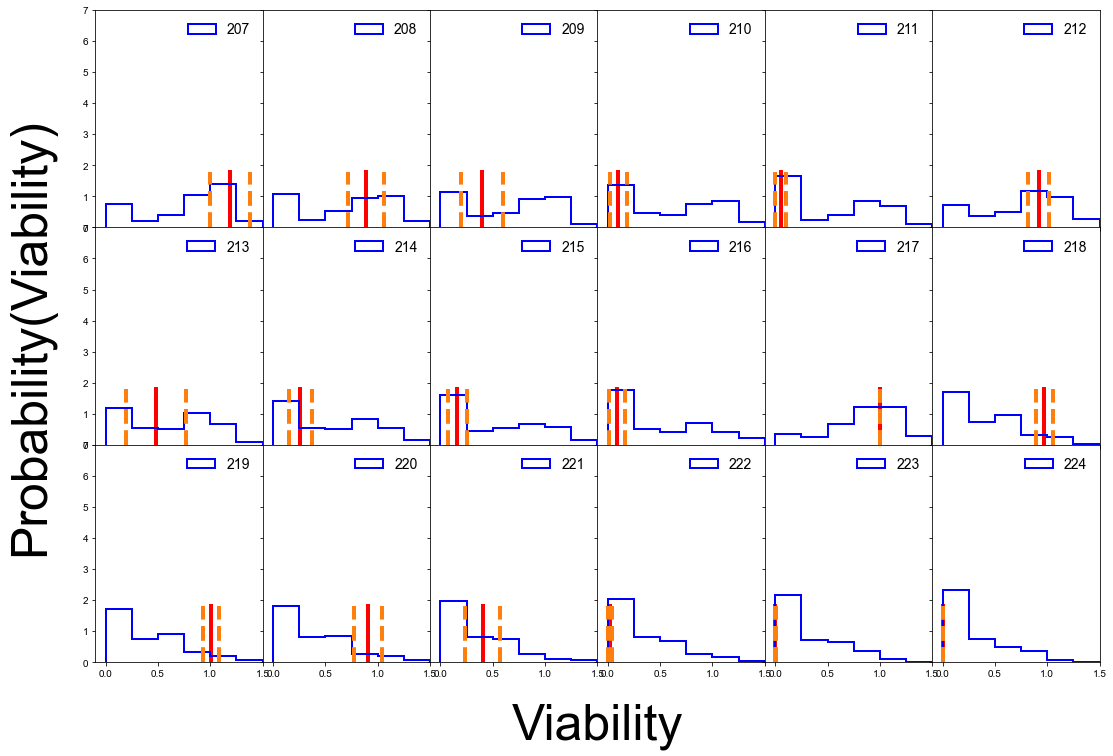

In [5]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 0, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out5[:, 0, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [6]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out5[:, 0, 0, i])
            b_list.append(M)

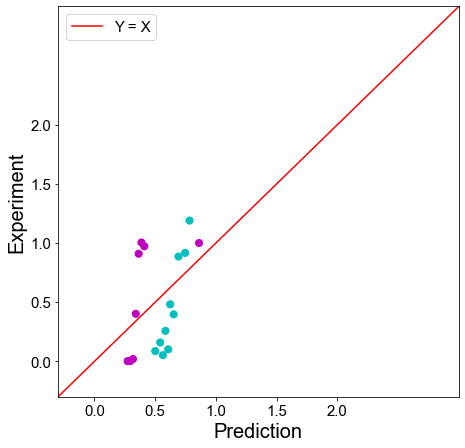

In [7]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.3535211490158785
0.3145016204465909
0.13439931775025094
0.3889468057263363
0.3961620158830973
0.1391037385385353
0.03234204914886424
0.21570447354825012
0.2732358279517051
0.30281041799803055
0.11927102445903681
0.611867283209064
0.6655925619081586
0.5917310073209101
0.10396865177523762
0.25986926238861296
0.2596629532855616
0.2422489064897971


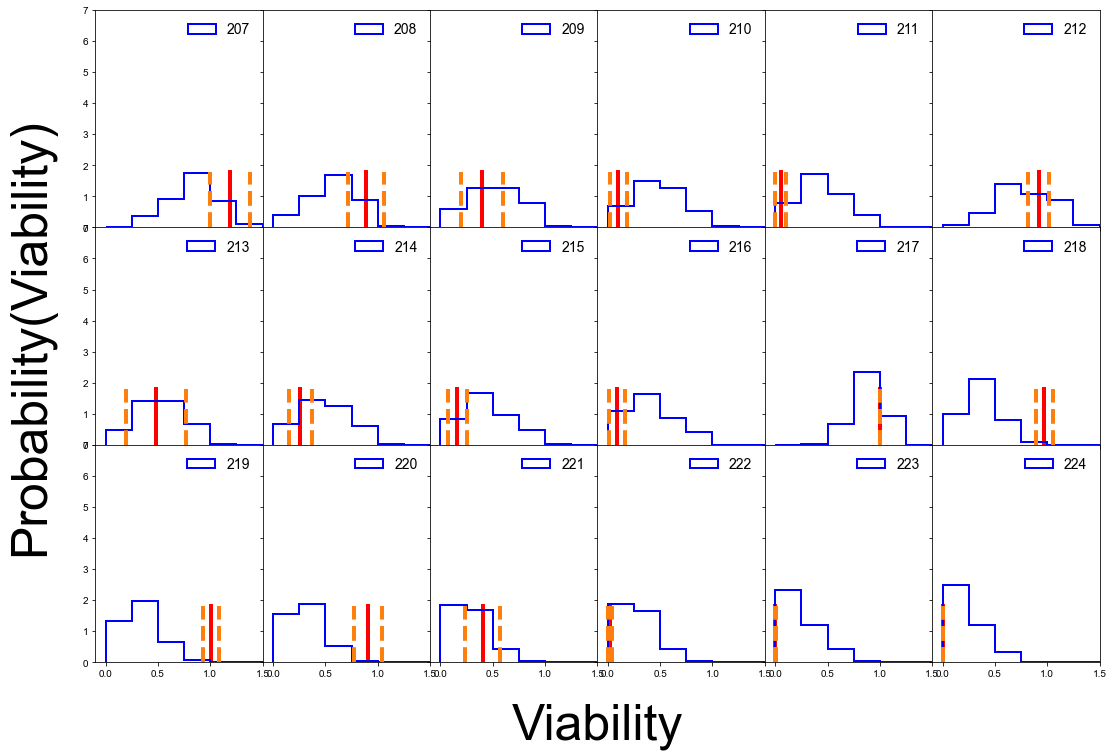

In [8]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 1, 0, i])
    ####variance= np.var(out5[:, 1, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out5[:, 1, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [9]:
  a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out5[:, 1, 0, i])
            b_list.append(M)

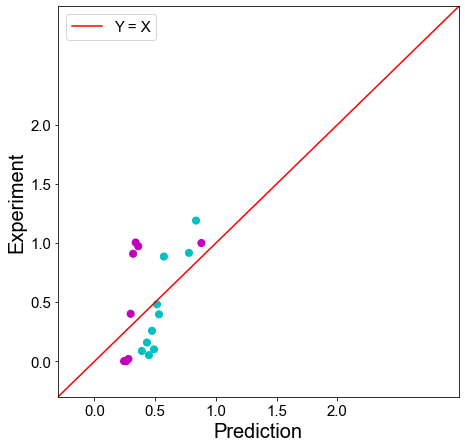

In [10]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.37818849089272266
0.29031034813789514
0.1573352897787781
0.40715122778776225
0.4076799664250525
0.15370078401982312
0.03535716785789328
0.22157656595850872
0.2813420100920413
0.31358310107794374
0.10657452170439752
0.5702007079681543
0.6272319307139739
0.5568767778173468
0.07219773161845522
0.2876203065967609
0.2838420423277493
0.263843825837055


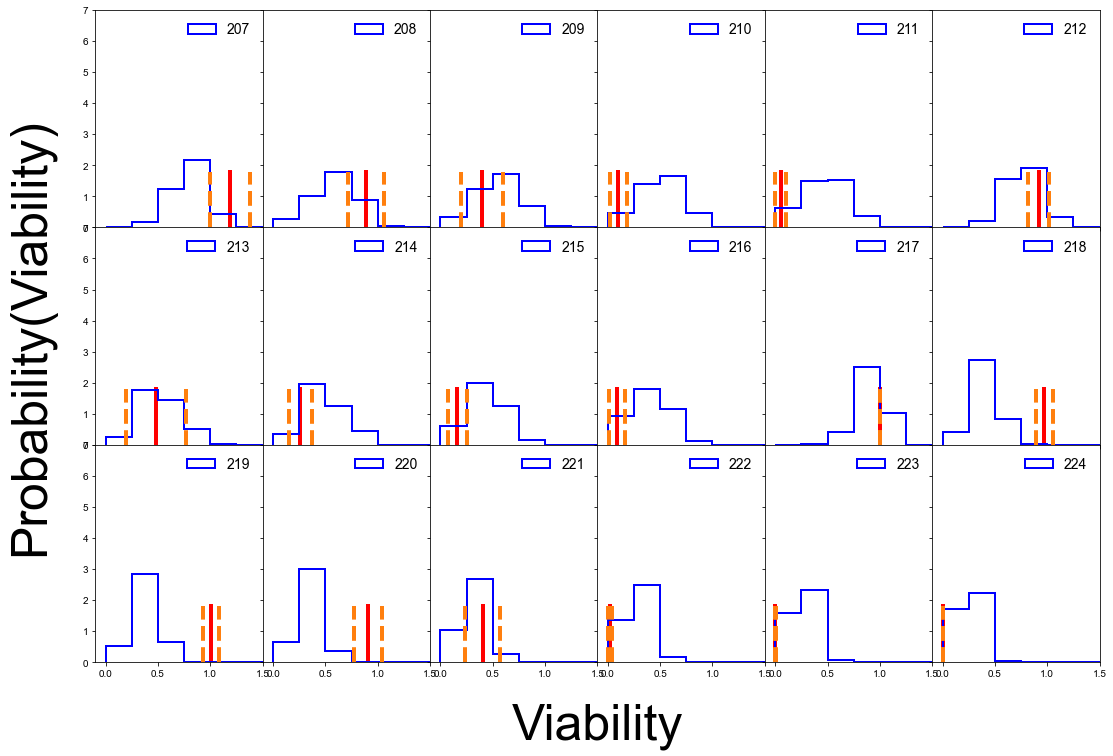

In [11]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 2, 0, i])
    ####variance= np.var(out5[:, 2, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out5[:, 2, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [12]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out5[:, 2, 0, i])
            b_list.append(M)

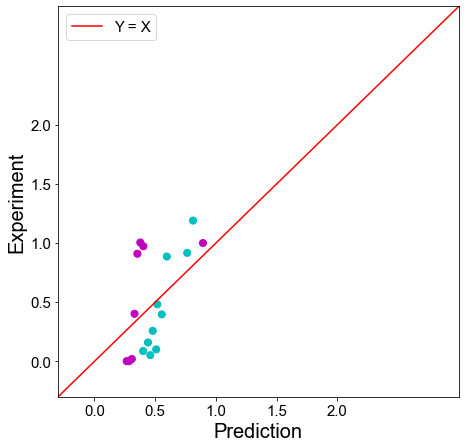

In [13]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.36300670197296026
0.25219273660487984
0.19607774638902908
0.44575963017863773
0.4427685044818868
0.13993847077041788
0.07820546597153294
0.2576528071437928
0.3083955970242368
0.3311318585543289
0.09981761382776289
0.5746976987055732
0.6320443360358985
0.5624172575377071
0.07839779791472917
0.2811228281222895
0.2768810263435516
0.2564971101990271


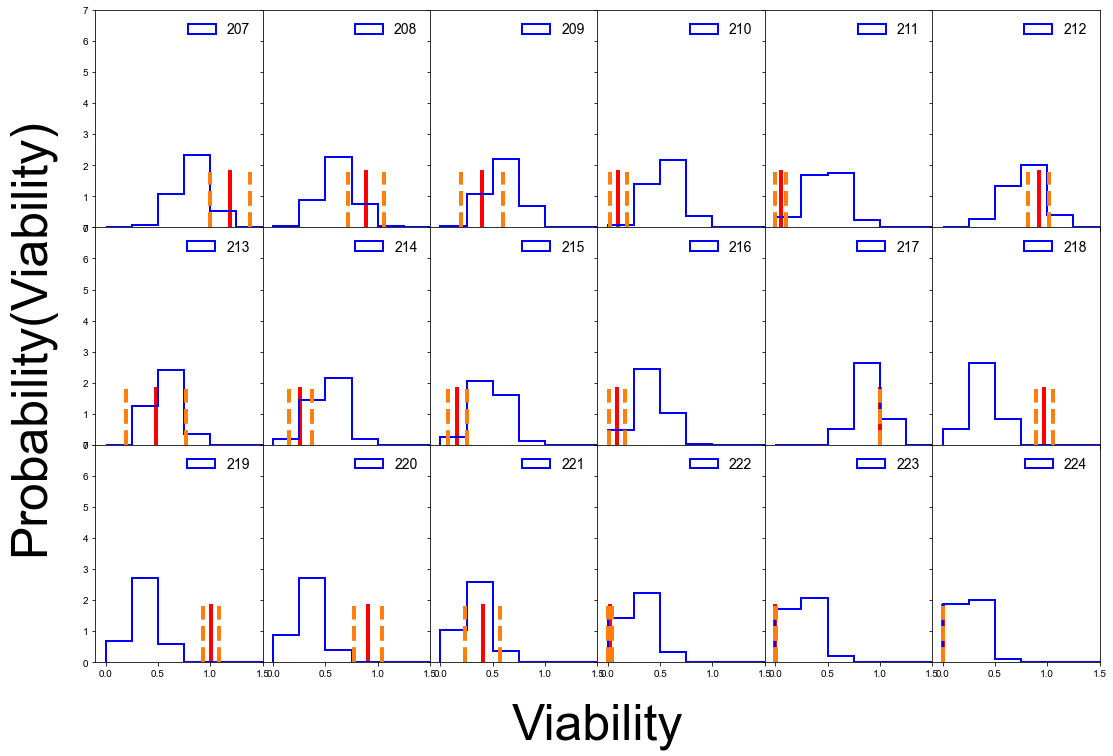

In [14]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 3, 0, i])
    ####variance= np.var(out5[:, 3, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out5[:, 3, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [15]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out5[:, 3, 0, i])
            b_list.append(M)

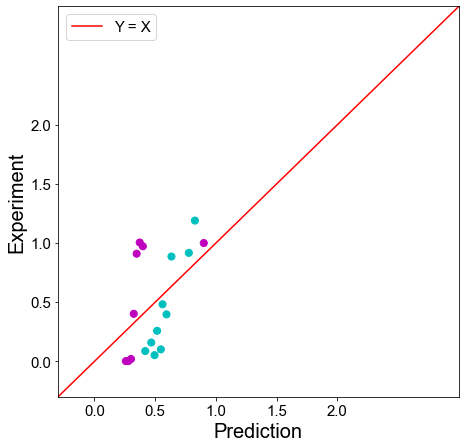

In [16]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()